In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

%matplotlib inline

In [2]:
df = pd.read_csv('datasets/Auto.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
X_train = df['horsepower']
Y_train = df['mpg']
X_train.unique(), Y_train.unique() # Some values have ? in them

(array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
        '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
        '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
        '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
        '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
        '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
        '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
        '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
        '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
        '64', '74', '116', '82'], dtype=object),
 array([18. , 15. , 16. , 17. , 14. , 24. , 22. , 21. , 27. , 26. , 25. ,
        10. , 11. ,  9. , 28. , 19. , 12. , 13. , 23. , 30. , 31. , 35. ,
        20. , 29. , 32. , 33. , 17.5, 15.5, 14.5, 22.5, 24.5, 18.5, 29.5,
        26.5, 16.5, 31.5, 36. , 25.5, 33.5, 20.5, 30.5, 21.5, 43.1, 36.

In [4]:
droplist = X_train[X_train == '?'].index
X_train = X_train.drop(droplist)
Y_train = Y_train.drop(droplist)
X_train.unique(), Y_train.unique()

(array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
        '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
        '200', '210', '193', '100', '105', '175', '153', '180', '110',
        '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
        '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
        '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
        '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
        '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
        '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
        '64', '74', '116', '82'], dtype=object),
 array([18. , 15. , 16. , 17. , 14. , 24. , 22. , 21. , 27. , 26. , 25. ,
        10. , 11. ,  9. , 28. , 19. , 12. , 13. , 23. , 30. , 31. , 35. ,
        20. , 29. , 32. , 33. , 17.5, 15.5, 14.5, 22.5, 24.5, 18.5, 29.5,
        26.5, 16.5, 31.5, 36. , 25.5, 33.5, 20.5, 30.5, 21.5, 43.1, 36.1,
  

In [5]:
# Get the shape if they are the same
X_train.shape, Y_train.shape

((392,), (392,))

In [6]:
# Create a dataset for statsmodel
df2 = pd.DataFrame({
    'horsepower': X_train.astype('float'),
    'mpg': Y_train.astype('float')
})
df2.head()

,horsepower,mpg
0,130.0,18.0
1,165.0,15.0
2,150.0,18.0
3,150.0,16.0
4,140.0,17.0


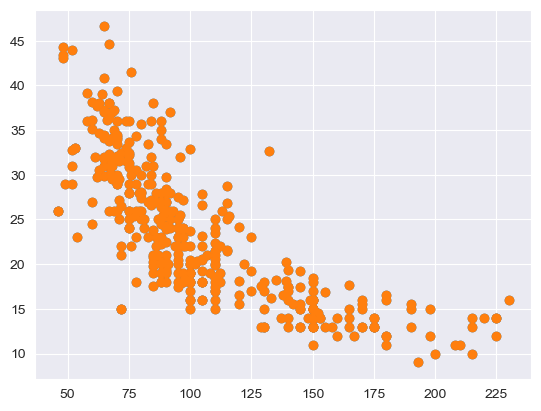

In [8]:
plt.scatter(df2['horsepower'], df2['mpg'])
plt.show()

In [11]:
mod = smf.ols(formula='mpg ~ horsepower', data=df2)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 02 Dec 2024   Prob (F-statistic):           7.03e-81
Time:                        12:48:35   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

 1. There is a relationship between predictor and response, We can reject NULL
hypothesis that the regression coefficients are zero. since F-statistic is larger
than 1 and p-value is closer to zero
2. Since R2 is just about 0.606 we can say 60% of variance in mpg is explained by horsepower
3. Relationship is negative because the coefficient to horsepower is -0.1578

<Figure size 640x480 with 0 Axes>

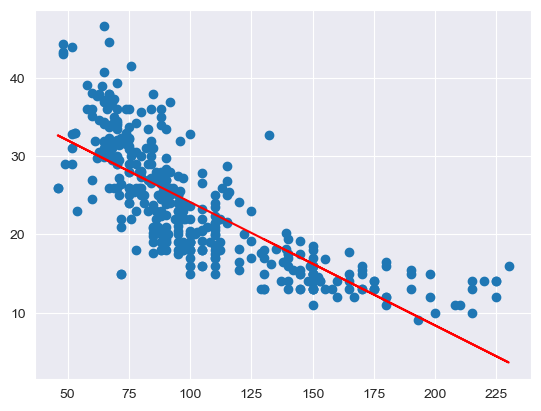

In [13]:
plt.subplots(1,1)
plt.scatter(X_train.astype('float'), Y_train.astype('float'))
plt.plot(X_train.astype('float'), res.fittedvalues, color='red')
plt.show()